In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    print('gpu', gpu)
    tf.config.experimental.set_memory_growth(gpu, True)
    print('memory growth:' , tf.config.experimental.get_memory_growth(gpu))

gpu PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
memory growth: True


## 1. Analyse the data and split it to train and test

In [2]:
import pandas as pd

spam_dataset = pd.read_csv("/home/dawidkubicki/Datasets/spam/spam.csv")

In [3]:
spam_dataset.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sentences = spam_dataset["Message"].tolist()

In [5]:
sentences

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'Ok lar... Joking wif u oni...',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'U dun say so early hor... U c already then say...',
 "Nah I don't think he goes to usf, he lives around here though",
 "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv",
 'Even my brother is not like to speak with me. They treat me like aids patent.',
 "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune",
 'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.',
 'Had you

In [6]:
labels = spam_dataset["Category"].tolist()

In [7]:
labels

['ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'spam',
 'h

Separate the data

In [8]:
my_list = [0 if i=='ham' else i for i in labels]
my_list = [1 if i=='spam' else i for i in my_list]

labels = my_list

In [9]:
training_size = int((len(sentences) *0.8))
print(training_size)

4457


In [10]:
import numpy as np

X_train = np.array(sentences[:training_size])
y_train = np.array(labels[:training_size])

X_test = sentences[training_size:]
y_test = labels[training_size:]

In [11]:
y_train

array([0, 0, 1, ..., 0, 0, 0])

In [12]:
import numpy as np

y_train_final = np.array(y_train)
y_test_final = np.array(y_test)

In [13]:
y_train_final

array([0, 0, 1, ..., 0, 0, 0])

## 2. Tokenize the data

#### Tokenize them

In [14]:
vocab_size=1000
embedding_dim=16
max_length=100
trunc_type='post'
padding_type='post'
oov_tok="<OOV>"

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index

#### Pad seqeunce

In [15]:
sequences = tokenizer.texts_to_sequences(X_train)

In [16]:
sequences[0]

[53,
 425,
 1,
 813,
 814,
 573,
 68,
 10,
 1,
 85,
 129,
 332,
 1,
 144,
 1,
 1,
 66,
 60,
 1,
 142]

In [17]:
X_train[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [18]:
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
X_test = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test, maxlen=max_length, padding=padding_type, truncating=trunc_type)


## Model (first with Sequential)

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           16000     
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 6)                 9606      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25,613
Trainable params: 25,613
Non-trainable params: 0
_________________________________________________________________


In [20]:
y_train_final

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
num_epochs = 20
history=model.fit(padded, y_train_final, epochs=num_epochs, validation_data=(X_test_padded, y_test_final))

Epoch 1/20
140/140 [==============================] - 1s 3ms/step - loss: 0.4213 - accuracy: 0.8665 - val_loss: 0.1836 - val_accuracy: 0.8691
Epoch 2/20
140/140 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.8910 - val_loss: 0.1410 - val_accuracy: 0.9722
Epoch 3/20
140/140 [==============================] - 0s 1ms/step - loss: 0.1436 - accuracy: 0.9730 - val_loss: 0.1250 - val_accuracy: 0.9785
Epoch 4/20
140/140 [==============================] - 0s 1ms/step - loss: 0.1119 - accuracy: 0.9842 - val_loss: 0.1162 - val_accuracy: 0.9848
Epoch 5/20
140/140 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9880 - val_loss: 0.1081 - val_accuracy: 0.9848
Epoch 6/20
140/140 [==============================] - 0s 1ms/step - loss: 0.0952 - accuracy: 0.9904 - val_loss: 0.1032 - val_accuracy: 0.9848
Epoch 7/20
140/140 [==============================] - 0s 1ms/step - loss: 0.0807 - accuracy: 0.9931 - val_loss: 0.0995 - val_accuracy: 0.9839
Epoch 

## Plot the data

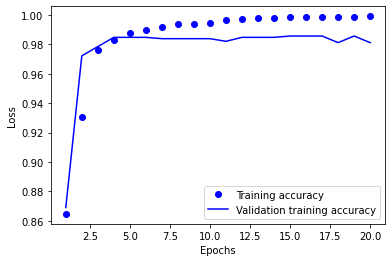

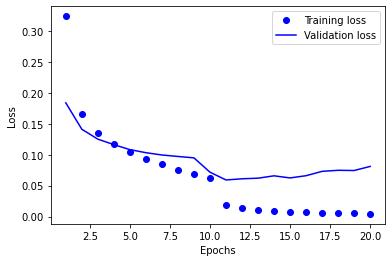

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label="Training accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation training accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Model with Eager Execution

In [23]:
#shuffle and batch dataset
train_ds = tf.data.Dataset.from_tensor_slices((padded, y_train_final)).batch(1)
test_ds = tf.data.Dataset.from_tensor_slices((X_test_padded, y_test_final)).batch(1)

In [24]:
#model

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        #embedding
        self.emb = tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length)
        #flatten
        self.flat = tf.keras.layers.Flatten()
        #dense
        self.d1 = tf.keras.layers.Dense(6, activation="relu")
        #dense
        self.d2 = tf.keras.layers.Dense(1, activation="sigmoid")
        
    def call(self, x):
        x = self.emb(x)
        x = self.flat(x)
        x = self.d1(x)
        return self.d2(x)
    
model = MyModel()

In [25]:
#optimizer and loss

loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [26]:
train_loss = tf.keras.metrics.Mean(name="train_loss")
train_accuracy = tf.keras.metrics.BinaryCrossentropy(name="train_accuracy")

test_loss = tf.keras.metrics.Mean(name="test_loss")
test_accuracy = tf.keras.metrics.BinaryCrossentropy(name="test_accuracy")

In [27]:
def train_step(text, labels):
    with tf.GradientTape() as tape:
        predictions = model(text, training=True)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    
    train_loss(loss)
    train_accuracy(labels, predictions)

In [28]:
def test_step(text, labels):
    predictions = model(text, training=False)
    t_loss = loss_object(labels, predictions)
    
    test_loss(loss)
    test_accuracy(labels, predictions)

In [ ]:
#training

EPOCHS = 20

for epoch in range(EPOCHS):
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()
    
    for text, labels in train_ds:
        train_step(text, labels)
        
    for test_text, test_labels in test_ds:
        test_step(text, labels)    
        
    print(f'Epoch {epoch + 1}, '
          f'Loss: {train_loss.result()}, '
          f'Accuracy: {train_accuracy.result() * 100}, '
          f'Test Loss: {test_loss.result()}, '
          f'Test Accuracy: {test_accuracy.result() * 100}')

Epoch 1, Loss: 0.6950777173042297, Accuracy: 132.60670471191406, Test Loss: 0.06602743268013, Test Accuracy: 0.011867986060678959
Epoch 2, Loss: 0.6931307911872864, Accuracy: 180.75558471679688, Test Loss: 0.06602743268013, Test Accuracy: 0.0009536748402751982
